# TP 1 - Andino, Asplanato, Murchison

In [17]:
# Importamos librerias
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

#### Definimos la función para importar los datos de las redes a partir de los archivos provistos.


In [18]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

# Ejercicio 1
#### Importamos los datos de las redes empleando la función anterior.

In [19]:
bina=ldata("tc01_data/yeast_Y2H.txt")
prot=ldata("tc01_data/yeast_AP-MS.txt")
lit=ldata("tc01_data/yeast_LIT.txt")

#### Generamos las redes de interacción de proteínas relevadas para levaduras.

In [25]:
B=nx.Graph()
B.add_edges_from(bina)
P=nx.Graph()
P.add_edges_from(prot)
L=nx.Graph()
L.add_edges_from(lit)

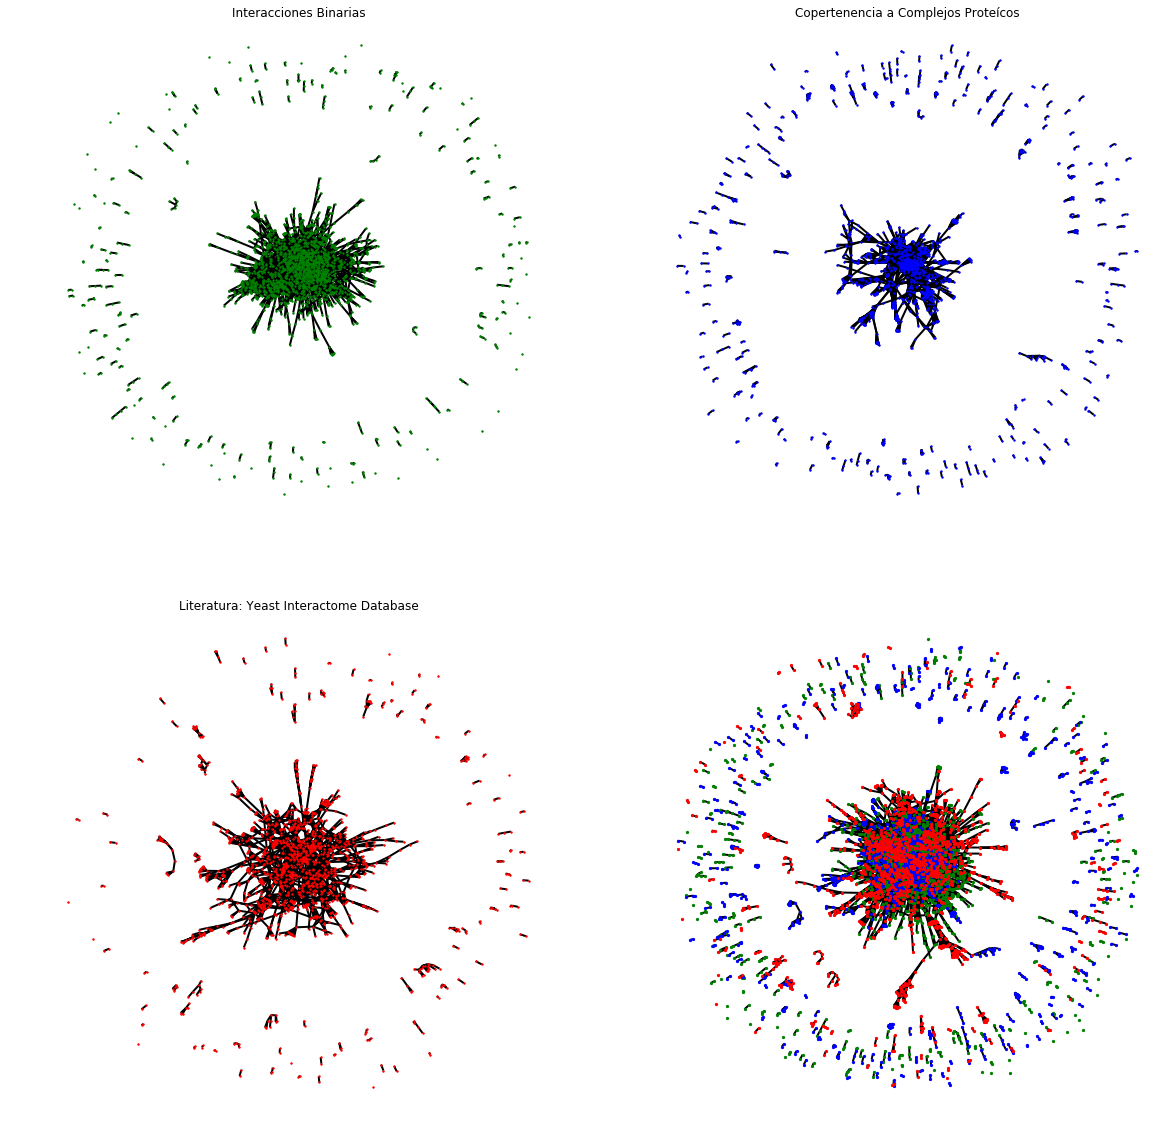

In [26]:
plt.figure(1, figsize = (20,20))
plt.subplot(221)
plt.title("Interacciones Binarias")
nx.draw(B, with_labels=False,node_color="green", node_size=2, width=0.5)

plt.subplot(222)
plt.title("Copertenencia a Complejos Proteícos")
nx.draw(P, with_labels=False, node_color="blue", node_size=2, width=0.5)

plt.subplot(223)
plt.title("Literatura: Yeast Interactome Database")
nx.draw(L, with_labels=False,node_color="red", node_size=2, width=0.5)

plt.subplot(224)
nx.draw(B, with_labels=False,node_color="green", node_size=5, width=0.5, label = 'Binaria')
nx.draw(P, with_labels=False, node_color="blue", node_size=5, width=0.5, label = 'Copertenencia')
nx.draw(L, with_labels=False,node_color="red", node_size=5, width=0.5, label = 'Literatura')

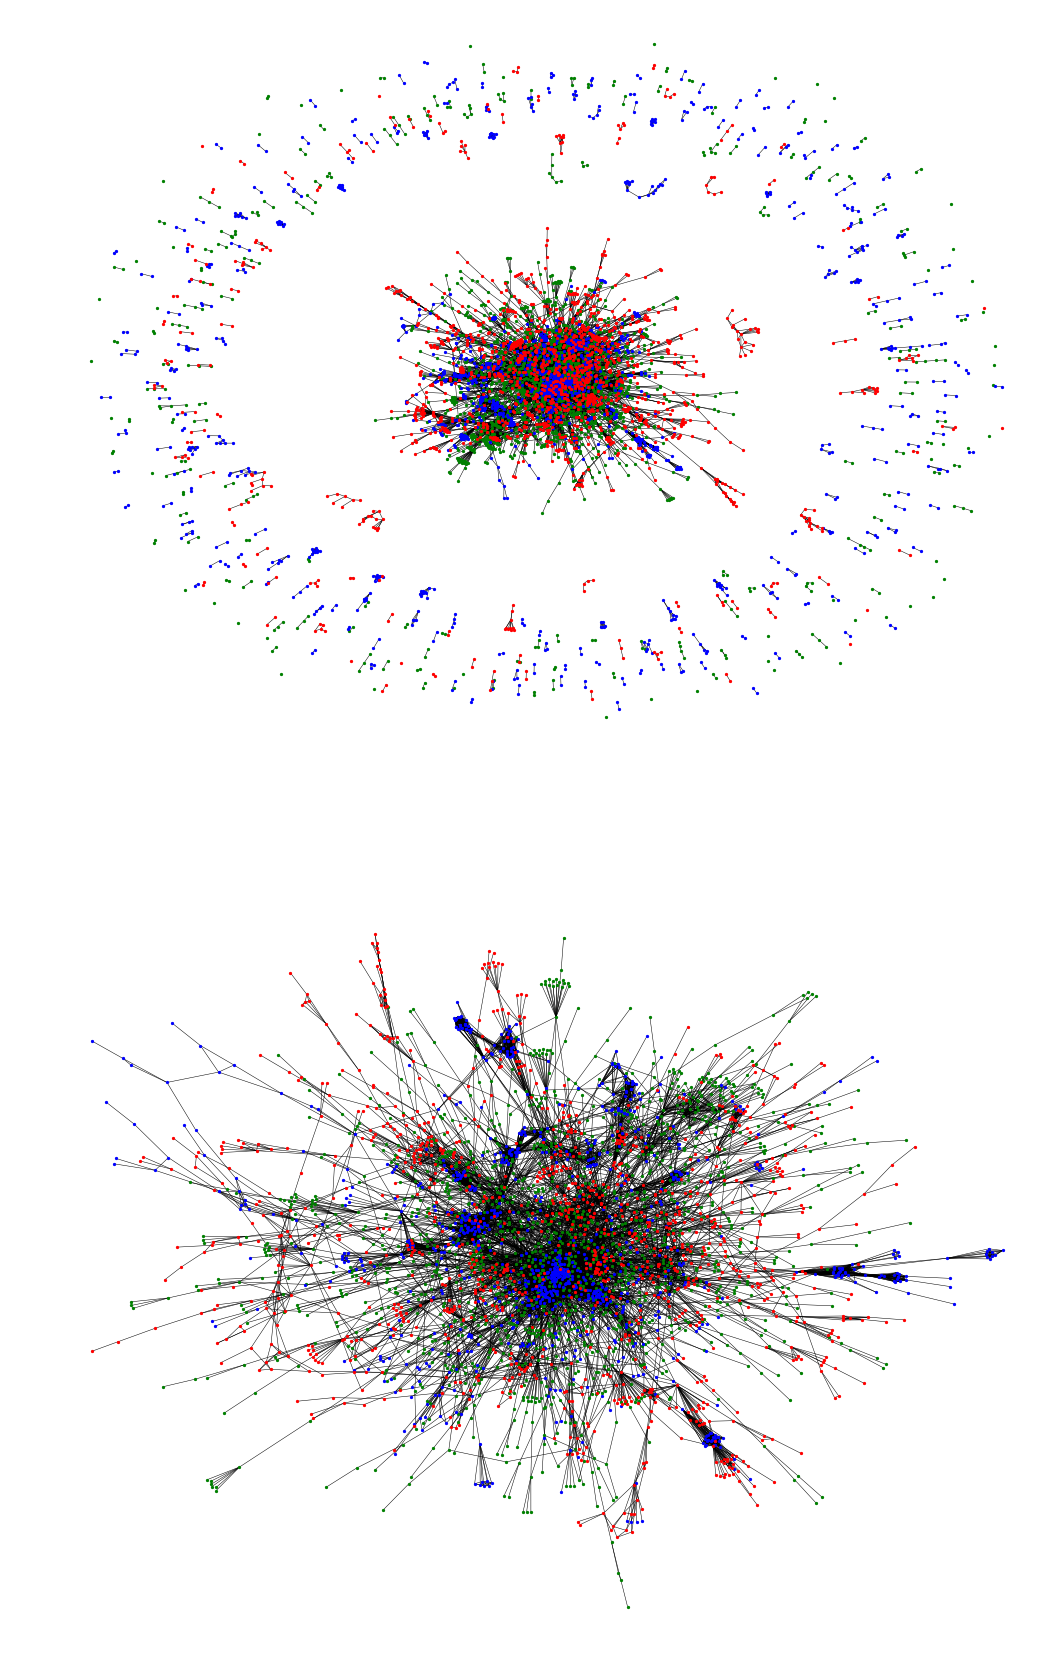

In [39]:
plt.figure(1, figsize = (18,30))

plt.subplot(211)
nx.draw(B, with_labels=False,node_color="green", node_size=5, width=0.5, label = 'Binaria')
nx.draw(P, with_labels=False, node_color="blue", node_size=5, width=0.5, label = 'Copertenencia')
nx.draw(L, with_labels=False,node_color="red", node_size=5, width=0.5, label = 'Literatura')

plt.subplot(212)
nx.draw(max(nx.connected_component_subgraphs(B), key=len), with_labels=False,node_color="green", node_size=5, width=0.5, label = 'Binaria')
nx.draw(max(nx.connected_component_subgraphs(P), key=len), with_labels=False, node_color="blue", node_size=5, width=0.5, label = 'Copertenencia')
nx.draw(max(nx.connected_component_subgraphs(L), key=len), with_labels=False,node_color="red", node_size=5, width=0.5, label = 'Literatura')

### Miramos los gráficos de cada red de manera individual y en conjunto. A primera vista parece que presentan la misma estructura global, con una gran componente gigante y muchas relaciones entre pocas (2-5) proteínas.

### Generamos vectores, matrices y funciones para armar la tabla de las redes con la información pedida.
#### La función "grados_BPL" recorre los nodos de una red y guarda el número de enlaces de los mismos para obtener el grado.
#### "Directed" evalúa si una red es o no dirigida corroborando que los pares de proteínas enlazadas no se encuentren repetidas. Si bien esperamos que los enlaces sean no-dirigidos en todos los casos por la naturaleza de los enlaces protéicos, lo corroboramos.

In [21]:
G=[B,P,L]

N = np.empty_like(G)          # número de nodos de la red
E = np.empty_like(G)          # número de enlaces de la red
G_mean = np.empty_like(G)     # grado medio de la red
G_max = np.empty_like(G)      # grado máximo
G_min  = np.empty_like(G)     # grado mínimo
dens = np.empty_like(G)       # densidad de la red
clu = np.empty_like(G)        # coeficiente de clustering local
clu_d = np.empty_like(G)      # coeficiente de clustering global/transitividad
diam = np.empty_like(G)       # diámetro de la red


def grados_BPL(r):
    L = len(G[r])
    degrees = np.zeros(L)
    for j in range(0,L): #G[r], un grafo particular de G
        degrees[j] = list(G[r].degree())[j][1]
    return degrees

def directed(A):
    for i in range(0,len(A)):
        for r in range(i+1,len(A)):
            if A[i][0] == A[r][1] and A[i][1] == A[r][0]:
                return "SI"
    return "NO"

#### Llenamos los vectores de antes con los datos para cada red, para tomarlos de input en la tabla a crear.

In [22]:
for i in range(len(G)):
    N[i] = G[i].number_of_nodes()
    E[i] = G[i].number_of_edges()
    G_mean[i] = np.mean(grados_BPL(i))
    G_max[i] = np.max(grados_BPL(i))
    G_min[i] = np.min(grados_BPL(i))
    dens[i] = nx.density(G[i])
    clu[i] = nx.average_clustering(G[i])
    clu_d[i] = nx.transitivity(G[i])
    diam[i] = nx.diameter(max(nx.connected_component_subgraphs(G[i]), key=len))

dirigido = [directed(bina), directed(prot), directed(lit)]

In [23]:
tabla = pd.DataFrame({"Red":["Binarias","Proteicas","Literatura"],"# de nodos":N,"# total de enlaces":E,"Grado medio":G_mean,"Grado máximo":G_max,"Grado mínimo":G_min,"Densidad de la red":dens,"Coef. de Clust. red": clu,"Clust. red Transitividad":clu_d,"Diámetro de la red":diam, "Dirigida?":dirigido})

print(tabla)

          Red # de nodos # total de enlaces Grado medio Grado máximo  \
0    Binarias       2018               2930     2.90387           91   
1   Proteicas       1622               9070     11.1837          127   
2  Literatura       1536               2925     3.80859           40   

  Grado mínimo Densidad de la red Coef. de Clust. red  \
0            1          0.0014397            0.046194   
1            1         0.00689927            0.554636   
2            1         0.00248117            0.292492   

  Clust. red Transitividad Diámetro de la red Dirigida?  
0                0.0236142                 14        NO  
1                  0.61859                 15        NO  
2                 0.346193                 19        NO  


#### Analizando los datos de la tabla, podríamos inferir que la red proteíca fue generada bajo la hipótesis que, ante un número de proteínas conectadas, todas interactúan entre sí. Esto lo podemos ver tanto en el número de enlaces, así como en el grado medio de la red. Si bien tiene un número de nodos comparable con la de la literatura, tiene un grado medio más de tres veces mayor. 
#### La red binaria parece haber sido generada imponiendo una conexión con las proteínas vecinas del grupo retirado con el anticuerpo. De esta forma, se explica que tenga un menor coeficiente de clustering de transitividad, puesto que no se llegan a cerrar todos los enlaces de las tríadas. 
#### Cabe destacar que el grado máximo de la red de literatura es menor que el de la red binaria, pero tiene un grado medio mayor. Nos llama la atención, y creemos que puede deberse a que la binaria presente un mayor número de 'hubs', pero se encuentre con menor conectividad en el resto de los nodos. Esta observación se ve respaldada por los valores de coeficiente de clustering de las redes, donde la red basada en la literatura presenta un valor mayor al de la binaria.

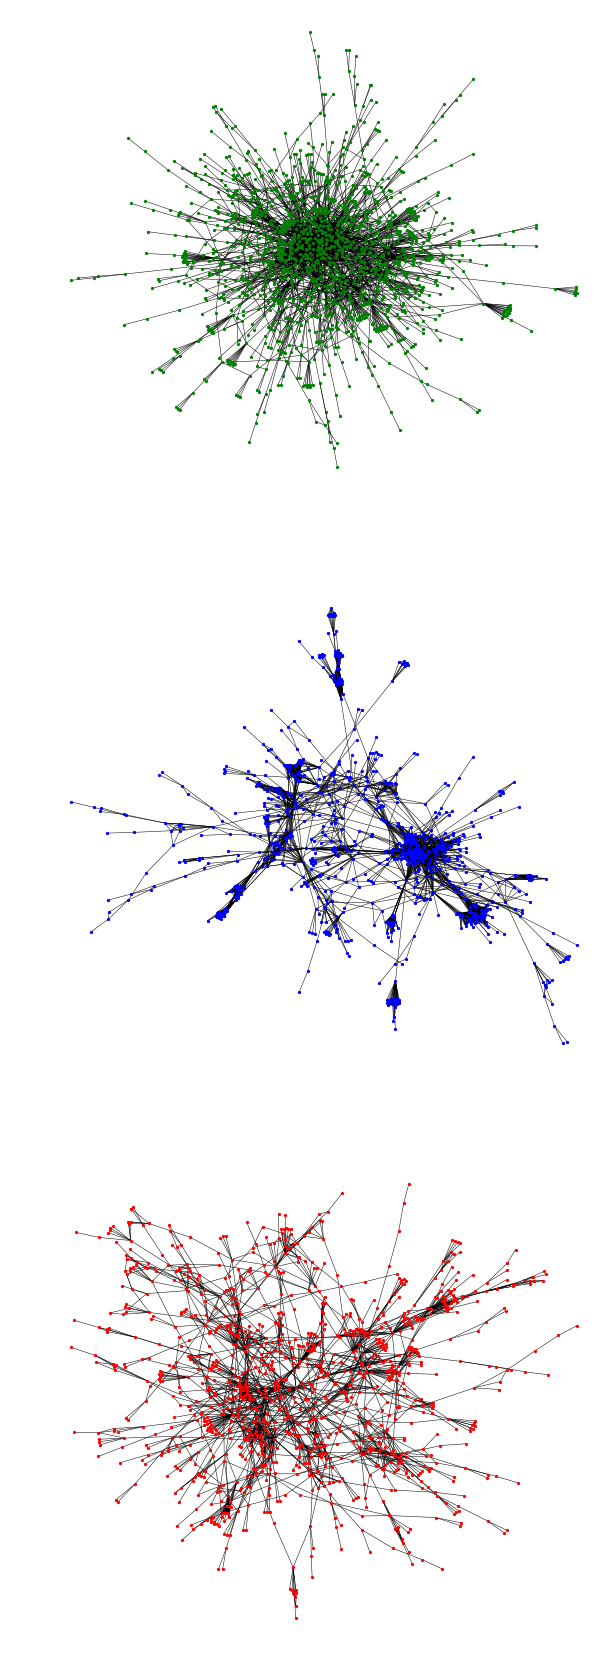

In [40]:
plt.figure(figsize = (10, 30))
plt.subplot(311)
nx.draw(max(nx.connected_component_subgraphs(B), key=len), with_labels=False,node_color="green", node_size=5, width=0.5, label = 'Binaria')

plt.subplot(312)
nx.draw(max(nx.connected_component_subgraphs(P), key=len), with_labels=False, node_color="blue", node_size=5, width=0.5, label = 'Copertenencia')

plt.subplot(313)
nx.draw(max(nx.connected_component_subgraphs(L), key=len), with_labels=False,node_color="red", node_size=5, width=0.5, label = 'Literatura')


#### Para tratar de confirmar nuestras hipótesis, nos centramos en las componentes gigantes de cada red, puesto que, ante la estructura general que observamos antes, es la que más peso tendrá en el análisis.
#### Se puede ver que la red binaria presenta un alto grado de conectividad a nivel global, mientras que la de copertenencia tiene muchos hubs. La red de literatura parece ser un punto medio entre las dos. Debido a esto, no podemos afirmar qué hipótesis se tomó para crearla. 

# Ejercicio 2

#### Importamos los datos de la red social de delfines, así como también el género de los mismos.

In [42]:
delfg= nx.read_gml("tc01_data/dolphins.gml")
delft= ldata("tc01_data/dolphins.txt")
dgen= ldata("tc01_data/dolphinsGender.txt")

#### Asociamos el género de cada delfín a su nodo correspondiente. Además, generamos un mapa de colores para el género de manera de poder diferenciarlos en el ploteo de la red.

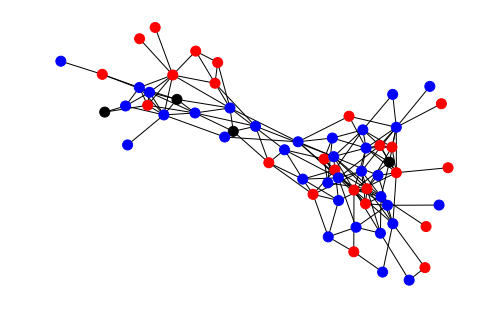

In [43]:
for n,g in zip(delfg.nodes, [a[1] for a in dgen]):
    delfg.nodes[n]['Gender']= g
    
dict(delfg.nodes.data())

color_map=[]
for i in range(0,nx.number_of_nodes(delfg)):
        if [a[1] for a in dgen][i]=='f':
            color_map.append('r')
        elif [a[1] for a in dgen][i]=='m':
            color_map.append('b')
        else:
            color_map.append('k')

nx.draw(delfg, node_color= color_map,  node_size=100)

#### En principio, no nos parece encontrar un patrón evidente en esta red. Graficamos la misma con distintos arreglos para ver si alguno de ellos logra manifestar algún comportamiento social en particular.

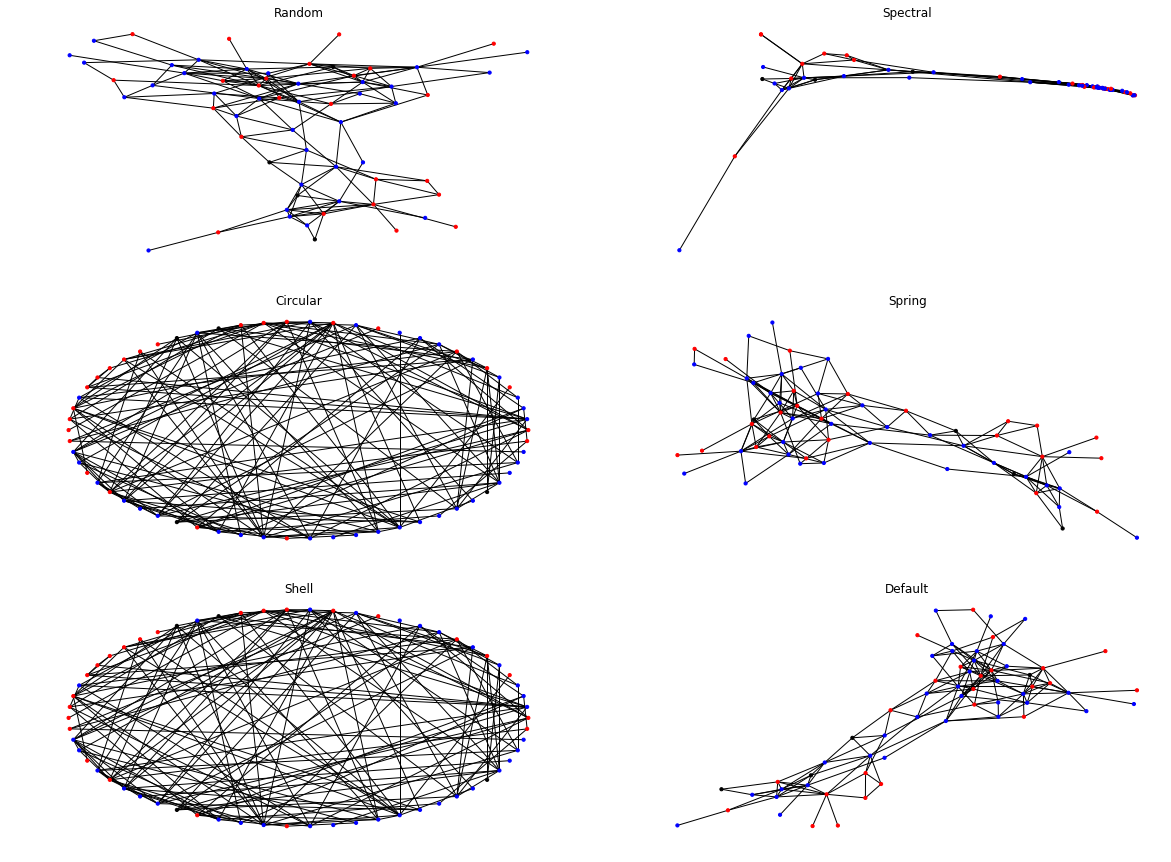

In [45]:
plt.figure(5, figsize=(20,15))

plt.subplot(321)
plt.title('Random')
nx.draw(delfg,node_color=color_map, node_size=10)

plt.subplot(322)
plt.title('Spectral')
nx.draw_spectral(delfg, node_color=color_map, node_size=10)

plt.subplot(323)
plt.title('Circular')
nx.draw_circular(delfg,node_color=color_map, node_size=10)

plt.subplot(324)
plt.title('Spring')
nx.draw_spring(delfg,node_color=color_map, node_size=10)

plt.subplot(325)
plt.title('Shell')
nx.draw_shell(delfg,node_color=color_map, node_size=10)

plt.subplot(326)
plt.title('Default')
nx.draw(delfg,node_color=color_map, node_size=10)

#### A priori, concluimos que no hay un comportamiento particular ya que no logramos identificar un patrón en ninguno de los arreglos anteriores. Realizamos un análisis cuantitativo para ver si esto es realmente lo que sucede.

#### Nos interesamos en particular, en la homofilia de la red. Entonces, vamos a comparar el número de enlaces inter e intra género.
#### Para ello precisamos calcular el número de enlaces que vinculan los distintos géneros entre sí (ff, mm, fm, fNA, mNA, NA-NA) y contrastarlos con los correspondientes a los valores estadisticos obtenidos a partir de la generación de nuevas redes en las cuales se varía aleatoriamente el género de los nodos, manteniendo la topología de la red (es decir, preservando los enlaces entre nodos, pero variando los atributos de estos) .
#### Esta generación de datos surge de suponer que la interacción entre delfines es independiente del género de los mismos. Dicho de otra forma, que se establezca un enlace no depende del atributo de los nodos.
#### Para calcular la cantidad de los distintos tipos de enlaces, utilizamos la función $\textit{"attribute_mixing_dict"}$ de la librería networkx, que, dada una red y el atributo que se quiere analizar, cuenta la cantidad de enlaces uniendo nodos con las distintas combinaciones de atributos.  A modo de verificación del funcionamiento de la función, corroboramos que la suma de los enlaces de las distintas clases sea la cantidad de enlaces totales; vimos que la función contabiliza de forma dirigida los enlaces, por lo que es necesario considerar sólo la mitad de los enlaces intragénero - de ahí el factor 1/2 en la cuenta-.

In [51]:
d=nx.attribute_mixing_dict(delfg, 'Gender')
print(d['m']['f'])
print(d['f']['m'])
print(d['m']['m'])
print(d['f']['f'])
print(d['NA'])
print(d['m']['f'] + d['m']['m']/2 + d['f']['f']/2 + d['NA']['f'] + d['NA']['m'] == nx.number_of_edges(delfg))

69
69
104
42
{'m': 12, 'f': 5}
True


#### Generamos el mixing aleatorio de géneros mediante un shuffling de la lista proveniente de nuestra red para tener exactamente la misma cantidad de delfines de cada tipo.  Ante cada asignación, calculamos la cantidad de enlaces entre géneros, y guardamos los resultados en una matriz ($\textit{"conexiones"}$), donde cada fila representó una clase de enlace distinta, y cada columna el número de iteración.

#### Realizamos estadística sobre los enlaces determinados en todas las iteraciones, calculando el valor medio y la desviación estándar, para compararlos con los de nuestra red de delfines.

In [62]:
N=2500
from random import shuffle
gen = np.asarray(dgen)
ranred=nx.read_gml("tc01_data/dolphins.gml")
conexiones=np.zeros((6,N))
for i in range(0,N):
    shuffle(gen[:,1])
    for n,g in zip(ranred,[a[1] for a in gen] ):
        ranred.nodes[n]['Gender']=g
    ransex=nx.attribute_mixing_dict(ranred, 'Gender')
    try:
        conexiones[0,i]=ransex['f']['m']
        conexiones[1,i]=ransex['f']['NA']
        conexiones[2,i]=ransex['m']['NA']
        conexiones[3,i]= ransex['f']['f']/2
        conexiones[4,i]=ransex['m']['m']/2
        conexiones[5,i]=ransex['NA']['NA']/2
    except KeyError:
        continue
stat=np.zeros((6,2))
for i in range(0,6):
    stat[i,0]=np.mean(conexiones[i,:])
    stat[i,1]=np.std(conexiones[i,:])
    
print('Valor medio y desviacón')
print(stat)

Valor medio y desviacón
[[68.7636      6.31288484]
 [ 8.0368      3.04831851]
 [11.3784      3.72687717]
 [23.2016      5.25815152]
 [46.9644      7.22805179]
 [ 0.5184      0.70715022]]


#### Una vez obtenidos los valores estadísticos decidimos compararlos con los de nuestra red realizando los cocientes de enlaces totales homo y heterofílicos, como se expresa a continuación. Consideramos el género "NA" como un género distinto.


In [64]:
print((d['f']['m']+d['NA']['m']+d['NA']['f'])/(stat[0,0]+stat[1,0]+stat[2,0]))#clases distintas
print((d['f']['f']+d['m']['m'])/(2*(stat[3,0]+stat[4,0]+stat[5,0])))#clases iguales

0.9752911130566532
1.0327597036969969


#### Estos cocientes parecen indicar que nuestra red tiene enlaces de tipo comparable con el azar, de manera que no podríamos afirmar ninguna de las dos tendencias.
#### Para afianzar estas observaciones, realizamos histogramas que muestren la distribución de las iteraciones al azar, y graficamos el valor de los delfines de nuestra red para visualizarlos.

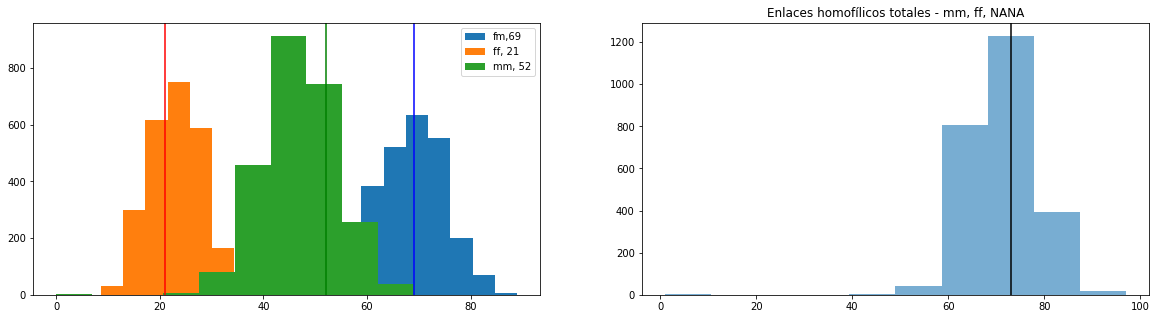

In [71]:
plt.figure(1, figsize = (20,5))
plt.subplot(121)
plt.hist(conexiones[0,:], label='fm,%i'%(d['f']['m']))
plt.hist(conexiones[3,:], label='ff, %i'%(d['f']['f']/2))
plt.hist(conexiones[4,:], label='mm, %i'%(d['m']['m']/2))
plt.axvline(x=d['f']['m'],color='b')
plt.axvline(x=d['m']['m']/2,color='g')
plt.axvline(x=d['f']['f']/2,color='r')
plt.legend()

plt.subplot(122)
plt.title('Enlaces homofílicos totales - mm, ff, NANA')
plt.hist(conexiones[3,:]+conexiones[4,:]+conexiones[5,i], label='igual',alpha=0.6)
plt.axvline(x=(d['f']['f']+d['m']['m'])/2,color='k')

#### Cuando analizamos los enlaces de cada tipo, notamos que el valor de nuestra red es cercano al valor medio de la distribución aleatoria en todos los casos, lo que sugiere que no tenemos variaciones significativas respecto del azar.
#### Sin embargo, estas pequeñas desviaciones respecto a la media sumadas podrían mostrar una desviación considerable al comparar el total de enlaces homofílicos.  De todos modos, vimmos que esto no sucede en este caso (de hecho, al considerar el total de enlaces homofílicos, nuestra red se encuentra más cercana a la media estadística que si consideramos los distintos tipos de enclaces por separado). 
#### A continuación, calculamos el p-valor para comparar cuantitativamente nuestro parámetro de homofilia en la red con la distribución estadística. Se entiende que éste representa la probabilidad de tener el valor encontrado, o algo más extremo. Por ende, para poder decir que nuestra red es homofílica, precisamos tener mayor número de enlaces homofílicos que la media de la distribución homofílica o, lo que es equivalente,  tener menor número de enlaces heterofílicos que los esperados por azar.

In [88]:
b = 0
for i in range(N):
    if conexiones[0,i]+conexiones[1,i]+conexiones[2,i]<=d['f']['m']+d['f']['NA']+d['NA']['m']:
        b = b+1
        #pval[i]=1
    else: 
        #pval[i]=0
        b = b
print('P - valor hetero = {}'.format(b/N))


a = 0
for i in range(N):
    if conexiones[3,i]+conexiones[4,i]+conexiones[5,i]>=(d['f']['f']+d['m']['m'])/2:
        a = a + 1
    else:
        a=a
print('P - valor homo = {}'.format(a/N))

P - valor hetero = 0.3812
P - valor homo = 0.3796


# Ejercicio 3

In [ ]:
autonom = nx.read_gml('tc01_data/as-22july06.gml')
grados = autonom.degree()
min_degree = min([a[1] for a in grados])
max_degree = max([a[1] for a in grados])
#%%
bines = np.linspace(0, max_degree, max_degree+1)
hist, bins = np.histogram([a[1] for a in grados], bins = bines)

#%%
bines_log = np.zeros(8) #con base 2 eran 12
for i in range(1, len(bines_log)):
	bines_log[i] = bines_log[i-1]+3**i
hist_log, bins_log = np.histogram([a[1] for a in grados], bins = bines_log)

#%%
plt.figure(1)
plt.subplot(221)
plt.title('Pk(k) bineo lineal')
plt.plot(bins[1:], hist, 'r.', )
plt.grid(True)

plt.subplot(222)
plt.title('Pk(k) bineo logarítmico')
plt.plot(bins_log[1:], hist_log, 'r.', )
plt.grid(True)

plt.subplot(223)
plt.title('Pk(k) bineo lineal loglog')
plt.loglog(bins[1:], hist, 'r.', )
plt.grid(True)

plt.subplot(224)
plt.title('Pk(k) bineo logarítmico loglog')
plt.loglog(bins_log[1:], hist_log, 'r.', )
plt.grid(True)


In [90]:
#Código choto de ajuste:
#Función con la que voy a fittear
powerlaw = lambda x, amp, index: amp * (x**index)

#"data"
xlog = bins_log[1:]
ylog = hist_log

#Funciones de fitting
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x))

#Lo que hace la optimización
pinit = [1.0, -1.0]
out = sp.optimize.leastsq(errfunc, pinit,args=(xlog, ylog), full_output=1)

pfinal = out[0]
covar = out[1]
print(pfinal)
print(covar)
index = pfinal[1]
amp = 10**pfinal[0]
#Ploteo (acá se caga)
plt.plot(xlog, powerlaw(xlog, amp, index),label = 'ajuste')
plt.loglog(xlog,ylog, label  = 'datos')
#plt.title('Best Fit Power Law')
#plt.xlabel('X')
#plt.ylabel('Y')
plt.xlim(1,10000)
#El exponente resulta ser -1,8379


NameError: name 'bins_log' is not defined

# Ejercicio 4

In [ ]:
netscience = nx.read_gml('tc01_data/netscience.gml')
internet = nx.read_gml('tc01_data/as-22july06.gml')

In [ ]:
def gradovecinos(red):
    nodes = red.nodes()
    vecinos_1 = np.zeros(len(nodes)) # acá voy a poner cuántos vecinos tiene cada uno
    vecinos_avg = np.zeros_like(vecinos_1)
    for i, value in enumerate(nodes):
        primeros = list(red.adj[value])
        vecinos_1[i] = len(primeros)
        if len(primeros)>0:
            b = np.zeros(len(primeros))
            for j, values in enumerate(primeros):
                b[j] = len(list(red.adj[values]))
            vecinos_avg[i] = np.mean(b)
     
    return vecinos_1, vecinos_avg


In [ ]:
def promgradvec (red):
    
    A,B=gradovecinos(red)
    kmax=int(max(A))
    grado=np.linspace(0,kmax,kmax+1)
    D=dict()
    
    for i in range (len(grado)):
        C=[]
        for j in range (len(A)):
            if A[j]==grado[i]:
                C.append(B[j])
        if len(C)>0:
            D[i]=C
        else :
            D[i]=0
    P=np.zeros(kmax+1)
    
    for l in range (len(P)):
        P[l]=np.mean(D[l])
    
    A = [[],[]]
    
    for i in range(len(P)):
        if P[i]>0:
            A[0].append(grado[i])
            A[1].append(P[i])
            
    return kmax,P,D,grado, A

In [ ]:
kn,pn,dn,gn, matn=promgradvec(netscience)
ki,pi,di,gi, mati=promgradvec(internet)

In [ ]:
plt.figure(1)
plt.plot(gn,pn,'.r')
plt.figure(2)
plt.plot(np.log(matn[0]), np.log(matn[1]),'.b')

In [ ]:
z = np.polyfit(np.log(matn[0]), np.log(matn[1]), 1)
x = np.linspace(0, max(np.log(matn[0])))
y = z[0]*x + z[1]

plt.plot(np.log(matn[0]), np.log(matn[1]), '.r')
plt.plot(x, y, 'b-')

In [ ]:
m = np.polyfit(np.log(mati[0]), np.log(mati[1]), 1)
x1 = np.linspace(0, max(np.log(mati[0])))
y1 = m[0]*x1 + m[1]

plt.plot(np.log(mati[0]), np.log(mati[1]), '.r')
plt.plot(x1, y1, 'b-')

In [ ]:
#Punto 4d, estimador de Newman
Adj_matrix_science = nx.adjacency_matrix(netscience)
Adj_matrix_lainterneh = nx.adjacency_matrix(internet)



In [ ]:
np.matrix(Adj_matrix_lainterneh)

In [ ]:
def newman(red):
    Adj = sp.sparse.dia_matrix.toarray(nx.adjacency_matrix(red))
    #n2 = red.nodes()
    L2 = len(red.nodes())
    vc = [a[1] for a in red.degree()]
    m = red.number_of_edges()
    num = np.zeros((L2,L2))
    den1= np.zeros(L2)
    den2= np.zeros((L2,L2))
    for i in range(0,L2):
        den1[i]= vc[i]**3
        for j in range(0,L2):
            r = vc[i]*vc[j]
            num[i][j] = (Adj[i][j] - r/(2*m))*r
            den2[i][j] = -r*r/(2*m)
    numtot=np.sum(num)
    den1tot=np.sum(den1)
    den2tot=np.sum(den2)
    den=den1tot+den2tot
    macri=numtot/den
    return macri
   

In [ ]:
newman(netscience)

In [ ]:
np.cov([a[1] for a in netscience.degree()],[a[1] for a in netscience.degree()])

In [ ]:
np.cov([a[1] for a in netscience.degree()],bias=True)

In [ ]:
newman(internet)

In [ ]:
#igraph, diferencia en r y mu, covarianza con numpy, codigo menos cavernícola usando el sparse.